In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings
import mglearn
warnings.filterwarnings(action='ignore')

- **교차 검증 반복 밖에서 전처리를 실행**

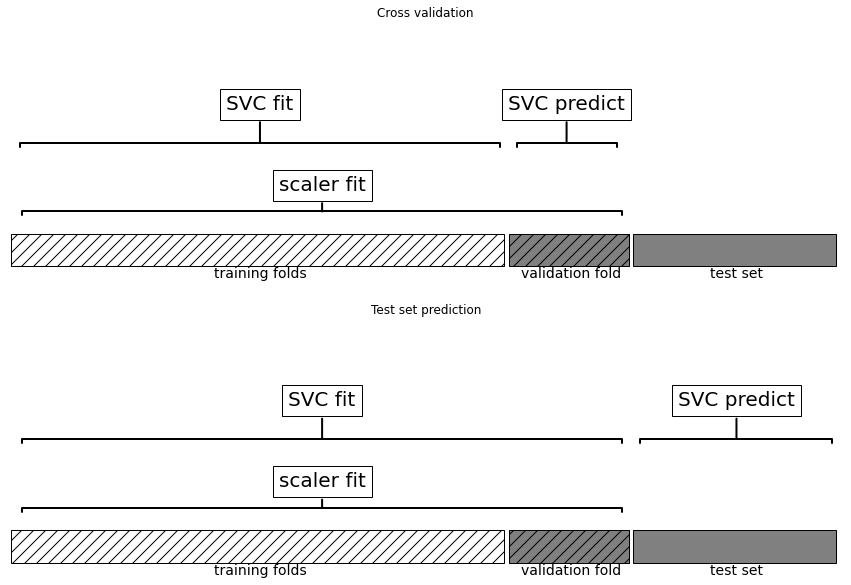

In [6]:
mglearn.plots.plot_improper_processing()

# 
# 
## 파이프라인 구축
### ```sklearn.pipeline.Pipeline()```

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [12]:
heart = pd.read_csv("C:/Soongsil/4-2학기/데이터 마이닝/데마 조별/heart.csv")

In [13]:
target1 = heart.HeartDisease
feature1 = heart.drop("HeartDisease", axis = 1)

x_train, x_test, y_train, y_test = train_test_split(feature1, target1,
                                                     train_size=0.7, random_state=0)

In [14]:
ct = make_column_transformer(
    (StandardScaler(), ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']),
    (OneHotEncoder(sparse = False), ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
)

In [19]:
pipe = Pipeline([('scaler', ct),
                 ('svm', SVC())]).fit(x_train, y_train)

In [20]:
pipe

Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('svm', SVC())])

In [22]:
pipe.score(x_train, y_train), pipe.score(x_test, y_test)

(0.9127725856697819, 0.855072463768116)

# 
# 
#### 그리드 서치에 파이프라인 적용

- **교차 검증 반복 안에서 전처리를 실행**

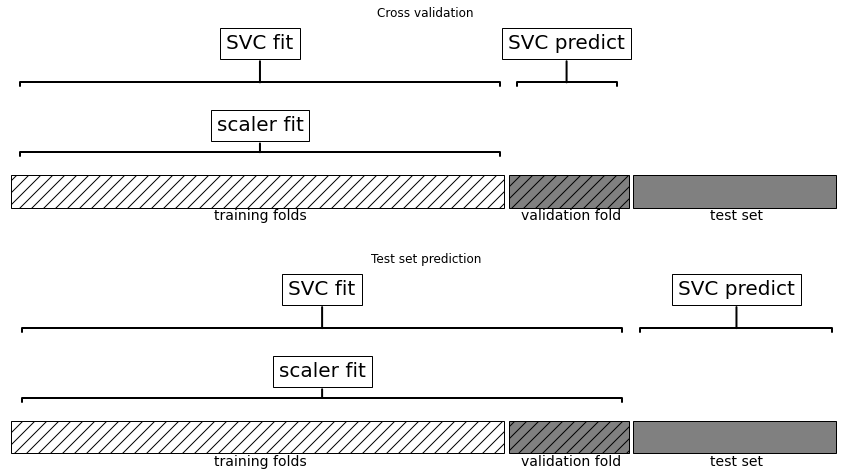

In [33]:
mglearn.plots.plot_proper_processing()

In [24]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [36]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5).fit(x_train, y_train)

In [37]:
grid.best_score_, grid.score(x_test, y_test), grid.best_params_

(0.8722868217054263, 0.8442028985507246, {'svm__C': 100, 'svm__gamma': 0.001})

# 
# 
### make_pipline
### ```sklearn.pipeline.make_pipeline()```

In [43]:
from sklearn.pipeline import make_pipeline

In [46]:
pipe_short = make_pipeline(
    ct, 
    SVC(C=100)).fit(x_train, y_train)

In [47]:
pipe_short

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('svc', SVC(C=100))])

In [49]:
pipe_short.steps

[('columntransformer',
  ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                   ['Age', 'RestingBP', 'Cholesterol',
                                    'FastingBS', 'MaxHR', 'Oldpeak']),
                                  ('onehotencoder', OneHotEncoder(sparse=False),
                                   ['Sex', 'ChestPainType', 'RestingECG',
                                    'ExerciseAngina', 'ST_Slope'])])),
 ('svc', SVC(C=100))]

In [55]:
pipe_short.named_steps['columntransformer']

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Age', 'RestingBP', 'Cholesterol',
                                  'FastingBS', 'MaxHR', 'Oldpeak']),
                                ('onehotencoder', OneHotEncoder(sparse=False),
                                 ['Sex', 'ChestPainType', 'RestingECG',
                                  'ExerciseAngina', 'ST_Slope'])])

In [57]:
pipe_short.named_steps['svc']

SVC(C=100)

# 
### 그리드 서치 안의 파이프라인 속성

In [58]:
from sklearn.linear_model import LogisticRegression

In [60]:
pipe = make_pipeline(ct, LogisticRegression(max_iter=1000))

In [61]:
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

In [62]:
grid = GridSearchCV(pipe, param_grid, cv=5).fit(x_train, y_train)

In [63]:
grid.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('logisticregression', LogisticRegression(C=1, max_iter=1000))])

In [67]:
grid.best_params_, grid.best_score_

({'logisticregression__C': 1}, 0.8707364341085271)

In [68]:
grid.best_estimator_.named_steps['logisticregression']

LogisticRegression(C=1, max_iter=1000)

In [70]:
grid.best_estimator_.named_steps['logisticregression'].coef_

array([[ 0.00174214,  0.16799207, -0.30521075,  0.52539396, -0.22835929,
         0.37146846, -0.66863041,  0.66877295,  1.14542434, -0.83912957,
        -0.36953599,  0.06338376,  0.3196184 , -0.02140965, -0.29806621,
        -0.42478691,  0.42492945, -0.00642543,  1.28104526, -1.2744773 ]])

# 
# 
# 
### 전처리와 모형의 매개변수를 위한 그리드 서치

In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [73]:
pipe = make_pipeline(
    ct,
    PolynomialFeatures(),
    Ridge())

In [78]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [79]:
grid = GridSearchCV(pipe, param_grid, cv=5).fit(x_train, y_train)

In [80]:
grid.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('ridge', Ridge(alpha=10))])

In [96]:
grid.best_score_, grid.best_estimator_.named_steps['polynomialfeatures'], \
    grid.score(x_train, y_train), grid.score(x_test, y_test)

(0.5691398733531061,
 PolynomialFeatures(degree=1),
 0.5929629776569485,
 0.5149277367377185)

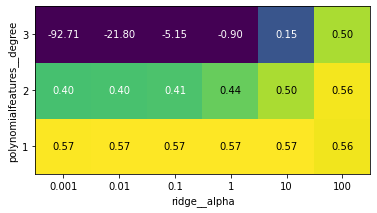

In [92]:
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3, -1),
                      xlabel='ridge__alpha', ylabel='polynomialfeatures__degree',
                      xticklabels=param_grid['ridge__alpha'],
                      yticklabels=param_grid['polynomialfeatures__degree'], vmin=0)
plt.show()

# 
# 
# 
### 모형 선택을 위한 그리드 서치

In [97]:
pipe = Pipeline([('preprocessing', ct), ('classifier', SVC())])

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
param_grid = [
    {'classifier': [SVC()], 
     'preprocessing': [ct],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'preprocessing': [None], 
     'classifier__max_features': [1, 2, 3]}
]

In [102]:
grid = GridSearchCV(pipe, param_grid, cv=5).fit(x_train, y_train)

In [104]:
grid.best_params_, grid.best_score_, \
    grid.score(x_train, y_train), grid.score(x_test, y_test)

({'classifier': SVC(C=100, gamma=0.001),
  'classifier__C': 100,
  'classifier__gamma': 0.001,
  'preprocessing': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                   ['Age', 'RestingBP', 'Cholesterol',
                                    'FastingBS', 'MaxHR', 'Oldpeak']),
                                  ('onehotencoder', OneHotEncoder(sparse=False),
                                   ['Sex', 'ChestPainType', 'RestingECG',
                                    'ExerciseAngina', 'ST_Slope'])])},
 0.8722868217054263,
 0.8800623052959502,
 0.8442028985507246)